In [2]:
N = ord("T") % 3 + 1
N

1

APC Data (Total count each day):
 [18523 18487 18470 18450 18433 18404 18395 18355 18332 18287 18254 18229
 18199 18175 18111 18072 18053 18002 17969 17939 17895 17876 17827 17800
 17765 17751 17740 17710 17679 17658 17627 17596 17579 17547 17503 17476
 17438 17396 17344 17304 17292 17252 17222 17170 17132 17093 17080 17077
 17071 17063 17043 17003 16955 16938 16925 16906 16897 16878 16878 16869
 16848 16821 16786 16760 16736 16722 16699 16681 16667 16648 16631 16620
 16599 16567 16542 16521 16495 16480 16473 16461 16426 16402 16385 16368
 16363 16350 16341 16332 16323 16294 16286 16255 16238 16211 16203 16161
 16141 16103 16095 16074 16050 16039 16013 16000 15980 15963 15917 15902
 15883 15871 15862 15826 15811 15779 15755 15732 15715 15704 15685 15645
 15629 15611 15600 15583 15566 15550 15524 15505 15480 15459 15450 15431
 15413 15398 15383 15372 15337 15319 15307 15287 15269 15263 15234 15208
 15187 15176 15144 15131 15105 15096 15076 15036 15020 15002 14980 14947
 14935 14913 1489

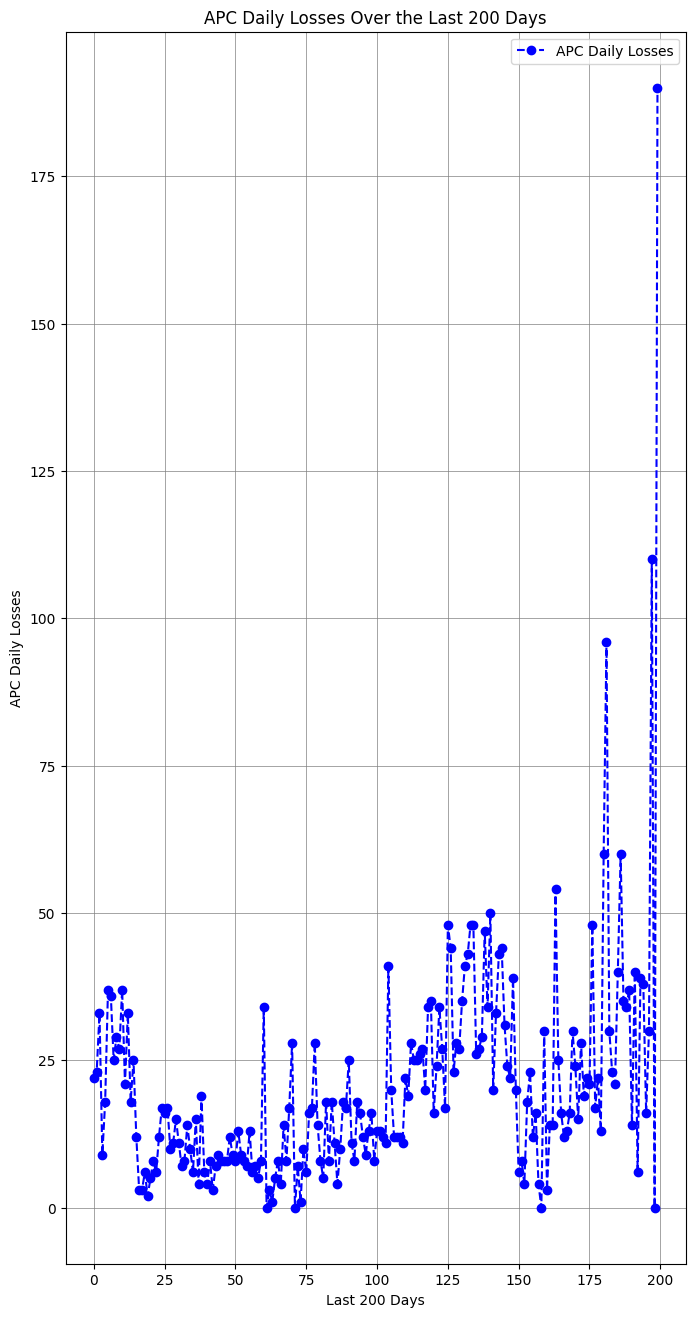

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# 1. Функція для завантаження даних із вказаного стовпця
def load_column_data(filename, column_name, is_date=False):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(column_name)
        if is_date:
            column_data = [row[column_index] for row in reader if row[column_index]]
        else:
            column_data = [int(row[column_index]) for row in reader if row[column_index]]
    return np.array(column_data)

# 2. Завантаження даних APC та дат
filename = 'russia_losses_equipment.csv'
apc_data = load_column_data(filename, 'APC')  # Масив загальної кількості БТР
dates = load_column_data(filename, 'date', is_date=True)  # Масив дат

# 3. Обчислення добових втрат APC
def daily_losses(data):
    return np.diff(data) * -1  # Отримуємо позитивні втрати

daily_apc_losses = daily_losses(apc_data)  # Масив добових втрат БТР

# Виведення масивів кількості БТР та добових втрат
print("APC Data (Total count each day):\n", apc_data)
print("Daily APC Losses:\n", daily_apc_losses)

# 4. Визначення 5 найбільших добових втрат
def top_5_losses(daily_data):
    sorted_indices = np.argsort(daily_data)[-5:][::-1]
    return daily_data[sorted_indices]

top_5_daily_losses = top_5_losses(daily_apc_losses)
print("Top 5 daily APC losses:", top_5_daily_losses)

# 5. Підрахунок втрат БТР влітку 2024 року (без циклу)
def calculate_summer_losses(data, dates):
    summer_mask = (np.array(dates[1:]) >= '2024-06') & (np.array(dates[1:]) <= '2024-08')
    return np.sum(data[summer_mask])

summer_losses = calculate_summer_losses(daily_apc_losses, dates)
print("Summer 2024 APC losses:", summer_losses)

# 6. Середнє значення знищених APC за 100–500 дні війни
def average_losses(data, start_day, end_day):
    return np.mean(data[start_day:end_day])

average_loss_100_500 = average_losses(daily_apc_losses, 100, 500)
print("Average APC losses from day 100 to 500:", average_loss_100_500)

# 7. Побудова графіка втрат APC за останні 200 днів
def plot_last_200_days(data):
    last_200_days_data = data[-200:]
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(last_200_days_data, linestyle='--', color='blue', marker='o', label="APC Daily Losses")
    plt.title("APC Daily Losses Over the Last 200 Days")
    plt.xlabel("Last 200 Days")
    plt.ylabel("APC Daily Losses")
    plt.legend()
    plt.grid(color='gray', linestyle='-', linewidth=0.5)
    plt.savefig(r"C:\Windows\System32\JupyterLabs\apc_losses_last_200_days.png")
    plt.show()

# Побудова графіка
plot_last_200_days(daily_apc_losses)


In [13]:
import os
print(os.getcwd())


C:\Windows\System32
